1. Importing Libraries

In [5]:
import pandas as pd  # Data manipulation library
import numpy as np  # Provides numerical arrays and functions
import random
import matplotlib.pyplot as plt  # Data visualization library
from wordcloud import WordCloud, STOPWORDS  # Used to generate word cloud
import seaborn as sns  # Data visualization
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



2. Reading and Exploring the Data

In [6]:
# Exploring movies.csv
data = pd.read_csv('movies.csv')
print(data.shape)
print(data.head())  # Displays first 5 entries
print(data.info())

# Number of unique movies
movies = data['movieId'].unique().tolist()
print(len(movies))

# Exploring ratings.csv
ratings_data = pd.read_csv('ratings.csv', sep=',')
print(ratings_data.shape)

# Summary of ratings.csv
print(ratings_data.describe())

# Minimum and maximum rating
print(ratings_data['rating'].min())
print(ratings_data['rating'].max())


(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
9742
(100836, 4)
              userId        mo

3. Cleaning the Data

In [7]:
# Checking for null values
print(data.isnull().any())
print(ratings_data.isnull().any())

# Checking tags.csv
tags_data = pd.read_csv('tags.csv', sep=',')
print(tags_data.shape)
print(tags_data.isnull().any())

# Dropping null rows in tags.csv
tags_data = tags_data.dropna()
print(tags_data.isnull().any())

# Number of unique tags
unique_tags = tags_data['tag'].unique().tolist()
print(len(unique_tags))


movieId    False
title      False
genres     False
dtype: bool
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool
(3683, 4)
userId       False
movieId      False
tag          False
timestamp    False
dtype: bool
userId       False
movieId      False
tag          False
timestamp    False
dtype: bool
1589


4. Data Analysis

In [13]:
# Filtering movies by genre
drama_movies = data['genres'].str.contains('Drama')
print(data[drama_movies].head())
print(drama_movies.shape)

comedy_movies = data['genres'].str.contains('Comedy')
print(data[comedy_movies].head())
print(comedy_movies.shape)

# Searching for a movie by tag
tag_search = tags_data['tag'].str.contains('dark')
print(tags_data[tag_search].head())

# Merging movies.csv and ratings.csv
movie_data_ratings_data = data.merge(ratings_data, on='movieId', how='inner')
print(movie_data_ratings_data.head(3))

# Displaying high and low-rated movies
high_rated = movie_data_ratings_data['rating'] > 4.0
low_rated = movie_data_ratings_data['rating'] < 4.0
print(movie_data_ratings_data[high_rated].head(10))
print(movie_data_ratings_data[low_rated].head())

# Extracting year from title
data['year'] = data['title'].str.extract('.*\\((\\d{4})\\).*', expand=False)

print(data.head(5))

# Counting occurrences of each genre
def count_word(df, ref_col, liste):
    keyword_count = {s: 0 for s in liste}
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords):
            continue
        for s in liste_keywords:
            if pd.notnull(s):
                keyword_count[s] += 1
    return sorted(keyword_count.items(), key=lambda x: x[1], reverse=True), keyword_count

genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

keyword_occurences, _ = count_word(data, 'genres', genre_labels)
print(keyword_occurences)


    movieId                           title                genres  year
3         4        Waiting to Exhale (1995)  Comedy|Drama|Romance  1995
10       11  American President, The (1995)  Comedy|Drama|Romance  1995
13       14                    Nixon (1995)                 Drama  1995
15       16                   Casino (1995)           Crime|Drama  1995
16       17    Sense and Sensibility (1995)         Drama|Romance  1995
(9742,)
   movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                      

5. Data Visualization

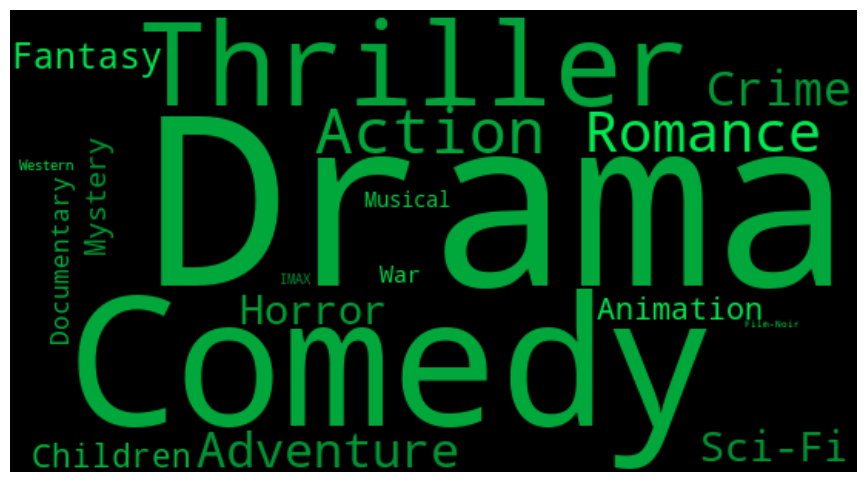

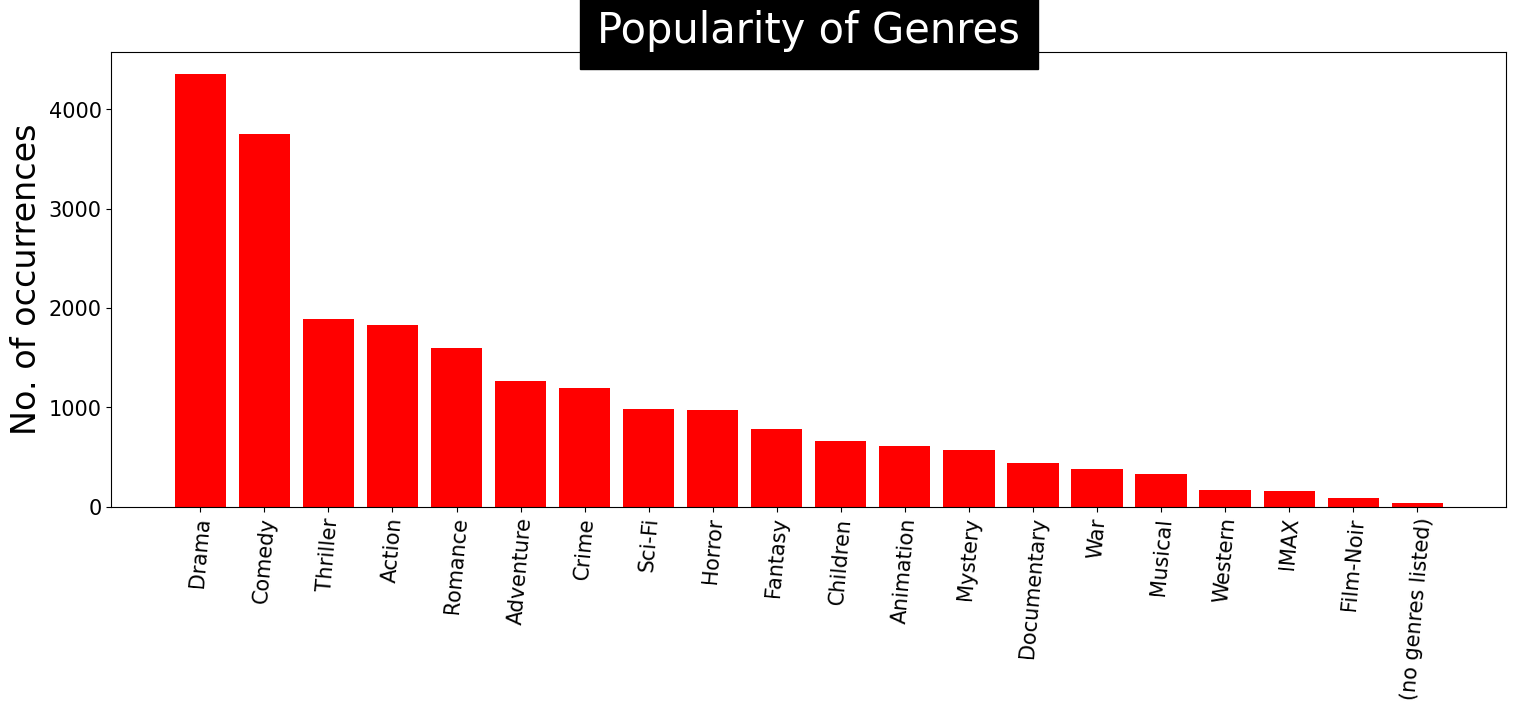

In [9]:
# WordCloud for Genres
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 100 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return f"hsl({h}, {s}%, {l}%)"

words = {s[0]: s[1] for s in keyword_occurences[:50]}
plt.figure(figsize=(14, 6))
wordcloud = WordCloud(width=550, height=300, background_color='black', 
                      max_words=1628, relative_scaling=0.7,
                      color_func=random_color_func, normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Genre Popularity Histogram
fig = plt.figure(figsize=(18, 13))
ax2 = fig.add_subplot(2, 1, 2)
y_axis = [i[1] for i in keyword_occurences[:50]]
x_axis = list(range(len(y_axis)))
x_label = [i[0] for i in keyword_occurences[:50]]
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurrences", fontsize=24)
ax2.bar(x_axis, y_axis, align='center', color='r')
plt.title("Popularity of Genres", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=30)
plt.show()


6. Machine Learning Model

100818 100818
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      7743
        True       1.00      1.00      1.00     12421

    accuracy                           1.00     20164
   macro avg       1.00      1.00      1.00     20164
weighted avg       1.00      1.00      1.00     20164



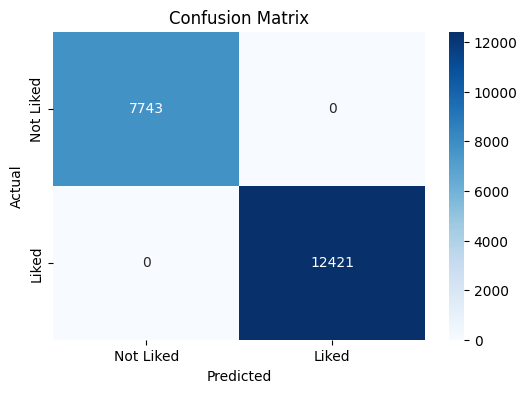

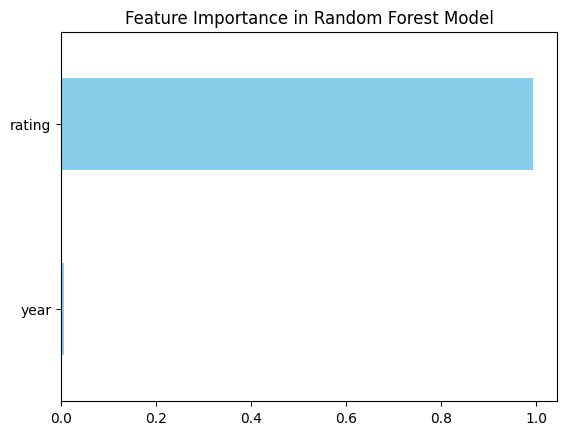

In [14]:
# Creating a binary target variable (liked if rating > 3, otherwise not liked)
movie_data_ratings_data['liked'] = movie_data_ratings_data['rating'] > 3

# Selecting features (year and rating)
X = movie_data_ratings_data[['year', 'rating']].dropna()

# Aligning target variable with X (before converting year)
y = movie_data_ratings_data.loc[X.index, 'liked']  
# X = X.drop(columns=['movieId'], errors='ignore')  # Remove movieId if present

# Converting 'year' to numerical
X['year'] = pd.to_numeric(X['year'], errors='coerce')

# Dropping NaN values again after conversion
X = X.dropna()
y = y.loc[X.index]  # Ensure y has same indices as X

# Debugging: Check if lengths match before train_test_split
print(len(X), len(y))  # Both should be the same

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(rf_classifier, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Visualization
feature_importances = pd.Series(best_rf_classifier.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance in Random Forest Model")
plt.show()
